In [1]:
import time
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelBinarizer

In [3]:
shift = 4320
shift_lbp = 8496

In [4]:
hog_features = 'C:\\Users\\rafae\\Desktop\\Coleta\\features\\features_hog_*.csv'
lbp_features = 'C:\\Users\\rafae\\Desktop\\Coleta\\features\\features_n_lbp_*.csv'

In [5]:
hog_files_list = glob.glob(hog_features)
print(len(hog_files_list))

lbp_files_list = glob.glob(lbp_features)
print(len(lbp_files_list))

513
513


In [6]:
# read features
frames = [pd.read_csv(f, header=0) for f in hog_files_list ]
len(frames)

# read features
lbp = [pd.read_csv(f, header=0) for f in lbp_files_list ]
len(lbp)

513

In [7]:
ds = pd.concat(frames)
ds_lbp = pd.concat(lbp)

In [8]:
print(ds.shape, ds_lbp.shape)

(7680, 17282) (7680, 8675)


In [9]:
ds.head()

,0,1,2,3,4,5,6,7,8,9,...,17272,17273,17274,17275,17276,17277,17278,17279,17280,17281
0,1,p002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.071793,0.090339,0.127822,0.127822,0.042653,0.053141,0.059538,0.003019,0.019839,0.127822
1,1,p002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.069514,0.119957,0.119957,0.119957,0.024254,0.051084,0.053452,0.014108,0.010533,0.119957
2,1,p002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.103166,0.037546,0.044686,0.122575,0.033838,0.104095,0.087389,0.003405,0.009884,0.017647
3,1,p002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.132490,0.091092,0.132490,0.123109,0.038147,0.132490,0.132490,0.050142,0.042432,0.028560
4,1,p002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.052366,0.038015,0.034714,0.061695,0.040908,0.070168,0.032586,0.004734,0.009425,0.023819


In [10]:
ds_lbp.head()

,0,1,2,3,4,5,6,7,8,9,...,8665,8666,8667,8668,8669,8670,8671,8672,8673,8674
0,1,p002,113,299,167,1052,2163,2223,527,324,...,0,0,0,0,0,0,0,0,0,0
1,1,p002,109,292,155,1023,2122,2287,517,305,...,0,0,0,0,0,0,0,0,0,0
2,1,p002,116,299,135,1078,2099,2196,521,310,...,0,0,0,0,0,0,0,0,0,0
3,1,p002,98,306,160,1027,2039,2236,510,317,...,0,0,0,0,0,0,0,0,0,0
4,1,p002,96,275,172,1063,2114,2283,558,326,...,0,0,0,0,0,0,0,0,0,0


In [11]:
yData = None
# IR1
yData = ds['0']
groups_data = ds['0']

#IR1 + IR2
#yData =  pd.concat([ds['0'],ds['0']], axis=0)

#groups_data =  pd.concat([ds['1'],ds['1']], axis=0)

In [12]:
xData = pd.concat([ds.iloc[:,2+shift:2+shift+shift], ds_lbp.iloc[:,2:2+shift_lbp]], axis=1)

#xData = None

#IR1 + IR2
#ir1 = pd.concat([ds.iloc[:,2+shift:2+shift+shift], ds_lbp.iloc[:,2:2+shift_lbp]], axis =1)
#ir2 = pd.concat([ds.iloc[:,2+shift+shift:2+shift+shift+shift], ds_lbp.iloc[:,2:2+shift_lbp]], axis =1)
#print(ir1.shape, ir2.shape, type(ir1))
#ir1 = ir1.transpose().reset_index(drop=True).transpose()
#ir2 = ir2.transpose().reset_index(drop=True).transpose()

#xData = pd.concat([ir1, ir2],axis=0,ignore_index=True)

In [13]:
yData.iloc[20]

10

In [14]:
print(yData.shape, xData.shape, type(yData), type(xData))

(7680,) (7680, 12816) <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


In [15]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn import cross_validation

# Compute confusion matrix
def plot_confusion(yTest, yTestPred, name):
    cm = confusion_matrix(yTest, yTestPred)
    np.set_printoptions(precision=2)

    # Normalize the confusion matrix by row (i.e by the number of samples in each class)
    cm_normalized = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])*100
    print('Classification report')
    print(classification_report(yTest, yTestPred))
    print('Normalized confusion matrix')
    print(cm_normalized)
    plt.figure(figsize=(5, 5))
    plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix (%s)' % (name))

    plt.show()
    # plot confusion matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
from sklearn.metrics import make_scorer,precision_recall_fscore_support

def search(X_train, X_test, y_train, y_test, group_data_train):
    
    # normalize data
    print("Normalizing data!")
    stdScale = preprocessing.StandardScaler().fit(X_train)
    xTrain = stdScale.transform(X_train)
    xTest = stdScale.transform(X_test)
    
    print("Grid Search Classifiers!")
    
    knc = KNeighborsClassifier()
    svc = SVC()
    rfc = RandomForestClassifier()
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
    clf1 = SVC()
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    vt = VotingClassifier(estimators=[('svc', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

    kncp = [{'n_neighbors': [3, 5, 7, 10],
             'weights': ['uniform','distance'],
              'algorithm': ['auto','kd_tree', 'brute']}]
    svcp = [{'kernel': ['rbf'], #{'kernel': ['rbf','linear'], 
             'class_weight':['balanced'],
             'gamma': [0.0001], #[0.1, 0.01, 0.001, 0.0001], #'gamma': [0.0001],#
             'decision_function_shape':['ovo'],
             'C': [15]}] #[0.001, 0.01, 0.1, 1.0, 1, 10, 50, 100, 500, 1000]}]#'C': [1000]}]#
    rfcp = [{'n_estimators': [10, 20, 50, 100,200], 
            'max_features': ['auto', 'log2'],
            'max_depth': [None],
            'bootstrap': [True, False],
            'criterion': ["gini", "entropy"]}]
    gbp = [{#'loss' : ['deviance', 'exponential'],
           'n_estimators': [10, 50,100, 200],
           'learning_rate': [0.001, 0.01, 0.1, 1.0,10],
           'max_features': ['auto', 'log2'],
           'max_depth' : [3,5,10, 100]
            }]
           #'min_impurity_decrease': [0.0]}]#, 0.1]}]
    vtp = [{'svc__C': [1.0, 100.0], 
            'rf__n_estimators': [20, 200],}]
   
    classifiers = [#('kNN', knc, kncp),                                 
                    ('Support Vector', svc, svcp),
                    #('Random Forest', rfc, rfcp),
                    #('Gradient Boosting', gb, gbp),
                    #('Vooting', vt, vtp)
    ]
    
    for name, classifier, params in classifiers:
        print(name)
        clf = GridSearchCV(classifier, params,n_jobs=4, cv=5, scoring=['f1_weighted','accuracy','precision_weighted', 'recall_weighted'], refit='f1_weighted' , verbose = 10)

        clf.fit(X_train, y_train, groups=group_data_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print(clf.best_score_)
        print()
        print(clf.cv_results_.keys())
        means = clf.cv_results_['mean_test_accuracy']
        stds = clf.cv_results_['std_test_accuracy']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        yTrue, yPred = y_test, clf.predict(X_test)
        print(classification_report(yTrue, yPred))
        plot_confusion(yTrue, yPred, name)
        print()

In [18]:
le = preprocessing.LabelEncoder()
le.fit(yData)
print(le.classes_)
yDataBin = le.transform(yData)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2000)
pca.fit(xData)

PCA(copy=True, iterated_power='auto', n_components=2000, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
xDataPCA = pca.transform(xData)

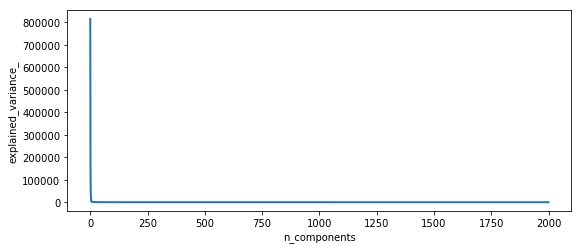

In [21]:
plt.figure(1, figsize=(10, 4))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

<class 'numpy.ndarray'> (6060,) (1620,)
TRAIN: [   0    1    2 ..., 7677 7678 7679] TEST: [ 135  136  137 ..., 7662 7663 7664]
[ 1  2  3  5  7  9 10 11 12 13 14 15 16 17 19]
[ 4  6  8 18]
1     435
0     426
2     418
6     417
11    405
10    405
12    405
4     405
8     404
15    390
18    390
14    390
13    390
9     390
16    390
Name: 0, dtype: int64
5     420
3     420
17    390
7     390
Name: 0, dtype: int64


Normalizing data!
Grid Search Classifiers!
Support Vector
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed: 102.8min remaining: 154.2min
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed: 103.1min remaining: 68.7min
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 153.6min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 153.6min finished


Best parameters set found on development set:

{'C': 15, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:
0.0822842508918

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_class_weight', 'param_decision_function_shape', 'param_gamma', 'param_kernel', 'params', 'split0_test_f1_weighted', 'split1_test_f1_weighted', 'split2_test_f1_weighted', 'split3_test_f1_weighted', 'split4_test_f1_weighted', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'rank_test_f1_weighted', 'split0_train_f1_weighted', 'split1_train_f1_weighted', 'split2_train_f1_weighted', 'split3_train_f1_weighted', 'split4_train_f1_weighted', 'mean_train_f1_weighted', 'std_train_f1_weighted', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy',

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00       420
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00       420
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00       390
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         17       0.00      0.00      0.00       390

avg / total       0.00      0.00      0.00      1620

Classification report
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.

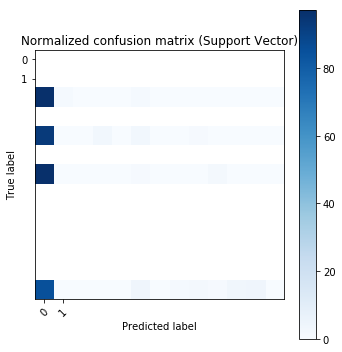


<class 'numpy.ndarray'> (6056,) (1624,)
TRAIN: [  30   31   32 ..., 7677 7678 7679] TEST: [   0    1    2 ..., 7662 7663 7664]
[ 2  4  5  6  7  9 11 12 13 14 15 16 17 18 19]
[ 1  3  8 10]
1     435
3     420
5     420
6     417
11    405
10    405
12    405
4     405
8     404
15    390
18    390
14    390
17    390
13    390
16    390
Name: 0, dtype: int64
0    426
2    418
9    390
7    390
Name: 0, dtype: int64


Normalizing data!
Grid Search Classifiers!
Support Vector
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed: 98.9min remaining: 148.4min
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed: 99.0min remaining: 66.0min
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 149.0min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 149.0min finished


Best parameters set found on development set:

{'C': 15, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:
0.0780243210774

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_class_weight', 'param_decision_function_shape', 'param_gamma', 'param_kernel', 'params', 'split0_test_f1_weighted', 'split1_test_f1_weighted', 'split2_test_f1_weighted', 'split3_test_f1_weighted', 'split4_test_f1_weighted', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'rank_test_f1_weighted', 'split0_train_f1_weighted', 'split1_train_f1_weighted', 'split2_train_f1_weighted', 'split3_train_f1_weighted', 'split4_train_f1_weighted', 'mean_train_f1_weighted', 'std_train_f1_weighted', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy',

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       426
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00       418
          3       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00       390
          9       0.00      0.00      0.00       390
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0

avg / total       0.00      0.00      0.00      1624

Classification report
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       426
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00       418
          3       0.

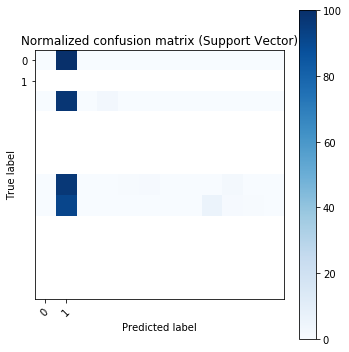

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit,GroupShuffleSplit
from scipy import stats

#gss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=0)
gss = GroupShuffleSplit(n_splits=2, test_size=0.20, random_state=10)

for train_index, test_index in gss.split(xData, yDataBin, groups=groups_data):
    print(type(train_index), train_index.shape, test_index.shape)
    print("TRAIN:", train_index, "TEST:", test_index)
    print(np.unique(groups_data.iloc[train_index]))
    print(np.unique(groups_data.iloc[test_index]))
    dt = pd.DataFrame(yDataBin[train_index])
    print(dt[0].value_counts())
    dte = pd.DataFrame(yDataBin[test_index])
    print(dte[0].value_counts())
    print()
    print()
    
    search(xData.iloc[train_index,:], xData.iloc[test_index,:], 
           yDataBin[train_index], yDataBin[test_index], 
           groups_data.iloc[train_index])    

In [ ]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(xData, yDataBin, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,
      type(X_train.shape), type(X_test.shape), type(y_train.shape), type(y_test.shape))

In [ ]:
search(X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(xData)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [ ]:
pca.transform(x_train)
pca.transform(x_test)

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = le.classes_
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='rbf', C=50, gamma=0.001)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
class_names = range(1,20)

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()